Import de Bibliotecas

In [4]:
from JogoDeForca import JogoDeForca
from funcoes import *
import requests 
import matplotlib.pyplot as plt
from collections import Counter

Leitura do arquivo com as palavras utilizadas

In [5]:
url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
r = requests.get(url, allow_redirects=True)
if r.status_code==200:
    content = str(r.content.decode()).split('\n')

Quantidade de palavras dado seu tamanho

In [10]:
# Cria o dicionário de tamanhos e imprime cada elemento
tamanho = {}
for palavra in content:
    if len(palavra) in tamanho:
        tamanho[len(palavra)] += 1
    else:
        tamanho[len(palavra)] = 1

for letras, quantidade in sorted(tamanho.items()):
    print(f"{letras}: {quantidade}")

0: 1
1: 4
2: 62
3: 296
4: 1604
5: 5481
6: 11397
7: 20548
8: 30681
9: 37390
10: 39831
11: 35120
12: 26824
13: 17347
14: 9961
15: 4994
16: 2207
17: 966
18: 405
19: 158
20: 60
21: 20
22: 7
23: 3


Algoritmo com 1000 Jogos de Forca

In [22]:
palavras_erradas = [] 
palavras_adivinhadas = [] 

# Loop para realizar 1000 jogos de forca
for i in range(1000): 
    # Inicia variáveis para cada iteração (Jogo, Tamanho, Letras Jogadas, Lista da Palavra iniciada em "False", 
    #                                      Índices (variável inicada em True para ver se a letra está na palavra) e Dicoinário)
    Jogo = JogoDeForca()
    tamanho = Jogo.novo_jogo()
    letras_jogadas = []
    palavra = [None for i in range(tamanho)]
    indices = True
    dicionario = remove_palavra_por_tamanho(content, tamanho)  # Filtra o dicionário de palavras pelo tamanho
    
    # Enquanto ainda houver letras não adivinhadas na palavra
    while None in palavra: 
        quant = calcula_quant_letra(dicionario)  # Calcula a quantidade de cada letra no dicionário
        probs = calcula_probabilidade(quant)  # Calcula as probabilidades de cada letra
        letra = maior_probabilidade(probs, letras_jogadas)  # Obtém a letra com maior probabilidade
        indices = Jogo.tentar_letra(letra)  # Tenta adivinhar a letra e retorna os índices onde ela está
        
        # Se a letra tentada não estiver na palavra
        if indices == False: 
            break 
        
        letras_jogadas.append(letra)  # Adiciona a letra à lista de letras jogadas
        
        # Se houver índices retornados
        if indices: 
            for indices in indices:  # Para cada índice retornado
                dicionario = remove_palavra_por_indice(dicionario, indices, letra)  # Filtra o dicionário pelos índices
                palavra[indices] = letra  # Atualiza a palavra adivinhada com a letra correta
        else:
            dicionario = remove_palavra_por_letra(dicionario, letra)  # Filtra o dicionário pela letra tentada
            
    # Se ainda houver letras não adivinhadas na palavra
    if None in palavra:
        print(f'Não foi possível adivinhar a palavra {Jogo.palavra}')
        palavras_erradas.append(Jogo.palavra) 
    else:
        palavras_adivinhadas.append(Jogo.palavra) 
        Jogo.tentar_palavra(''.join(palavra))  # Tenta adivinhar a palavra completa

Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Não foi possível adivinhar a palavra fungaria
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Não foi possível adivinhar a palavra mexa
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Não foi possível adivinhar a palavra ejetam
Ganhou!
Ganhou!
Fim de jogo!
Não foi possível adivinhar a palavra cuidasseis
Ganhou!
Ganhou!
Fim de jogo!
Não foi possível adivinhar a palavra agendai
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Fim de jogo!
Não foi possível adivinhar a palavra depilais
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Ganhou!
Gan

Gráfico do tamanho das palavras não adivinhadas pela quantidade

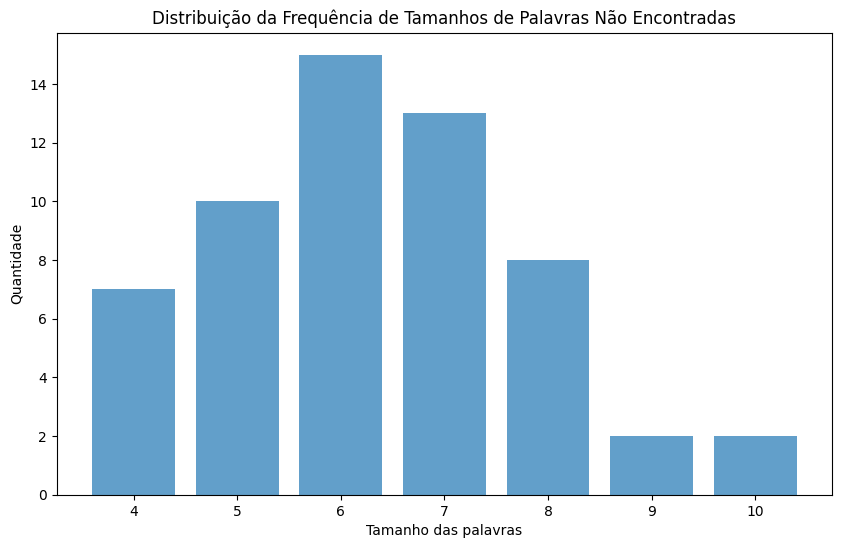

In [53]:
# Encontra o tamanho das palavras, faz a contagem e em seguida encontra a quantidade
tamanhos = [len(palavra) for palavra in palavras_erradas]
contagem = Counter(tamanhos)
quantidades = [contagem[num] for num in sorted(contagem)]

# Faz o plot do gráfico
plt.figure(figsize=(10, 6))
plt.bar(sorted(set(tamanhos)), quantidades, alpha=0.7)
plt.xlabel('Tamanho das palavras')
plt.ylabel('Quantidade')
plt.title("Distribuição da Frequência de Tamanhos de Palavras Não Encontradas")
plt.grid(False)
plt.show()

Quantidade de letras totais em nossa amostra <br>
Gráfico da probabilidade da letra ser de uma palavra não adivinhada pelo nosso algoritmo

a 1437
b 122
c 386
d 355
e 1180
f 127
g 156
h 71
i 901
j 32
l 274
m 571
n 428
o 744
p 224
q 31
r 903
s 1036
t 406
u 274
v 185
x 37
z 75


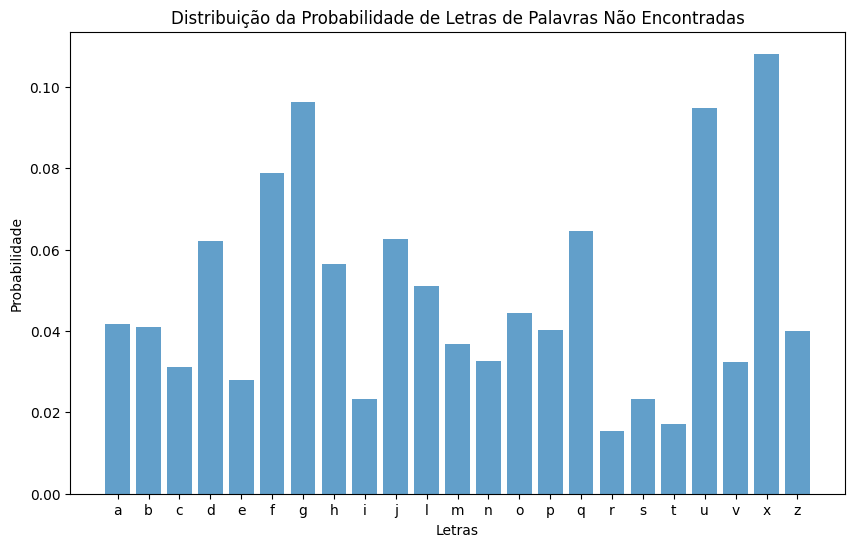

In [51]:
# Converte as palavras não adivinhadas para minúsculas
palavras_erradas = [palavra.lower() for palavra in palavras_erradas] 
palavras_adivinhadas = [palavra.lower() for palavra in palavras_adivinhadas] 

frequencia_erradas = calcular_frequencia_letras(palavras_erradas) 
frequencia_adivinhadas = calcular_frequencia_letras(palavras_adivinhadas)  
todas_letras = set(list(frequencia_erradas.keys()) + list(frequencia_adivinhadas.keys()))  

# Faz a contagem da frequência das letras 
for letra in todas_letras: 
    frequencia_erradas[letra] += 0 
    frequencia_adivinhadas[letra] += 0 

# Ordena as letras e em seguida faz a contagem
letras_ordenadas = sorted(todas_letras) 
contagens_erradas = [frequencia_erradas[letra] for letra in letras_ordenadas]  
contagens_adivinhadas = [frequencia_adivinhadas[letra] for letra in letras_ordenadas]

probabilidade = []  
for indice in range(len(contagens_adivinhadas)):  
    if contagens_erradas[indice] == 0:  # Se a letra não estiver presente nas palavras não adivinhadas
        total = contagens_adivinhadas[indice]  # Total de ocorrências da letra nas palavras adivinhadas
        probabilidade_parcial = 1 - contagens_adivinhadas[indice]  # Probabilidade da letra não ser encontrada
        probabilidade.append(probabilidade_parcial)  # Adiciona a probabilidade à lista
    else:
        total = contagens_adivinhadas[indice] + contagens_erradas[indice]  # Total de ocorrências da letra
        probabilidade_parcial = 1 - (contagens_adivinhadas[indice] / total)  # Probabilidade da letra não ser encontrada
        probabilidade.append(probabilidade_parcial)  # Adiciona a probabilidade à lista

# Faz o plot do gráfico
plt.figure(figsize=(10, 6)) 
plt.bar(letras_ordenadas, probabilidade, alpha=0.7) 
plt.xlabel('Letras') 
plt.ylabel('Probabilidade') 
plt.title('Distribuição da Probabilidade de Letras de Palavras Não Encontradas')  
plt.show()  